In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 航空乘客人数案例


In [4]:
# 读入数据
data = pd.read_csv('./data/airline-passengers.csv',parse_dates=[0])
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


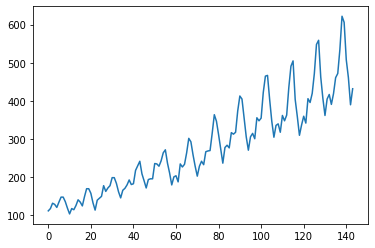

In [13]:
data = data.rename(columns={'Month':'ds','Passengers':'y'})
data.y.plot(x='ds',y='y')

In [14]:
# Create Training and Test
train_size= int(len(data)*0.85)
test_size= len(data) -train_size
train = data[:train_size]
test = data[train_size:]

In [15]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
117,1958-10-01,359
118,1958-11-01,310
119,1958-12-01,337
120,1959-01-01,360


In [18]:
m.make_future_dataframe?

In [21]:
# Python
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17,1960-08-01,515.665825,491.414578,540.211366
18,1960-09-01,476.001466,450.251209,501.582116
19,1960-10-01,443.386569,416.295592,467.730898
20,1960-11-01,414.887003,390.048010,438.490559
21,1960-12-01,441.018183,417.438055,465.834355


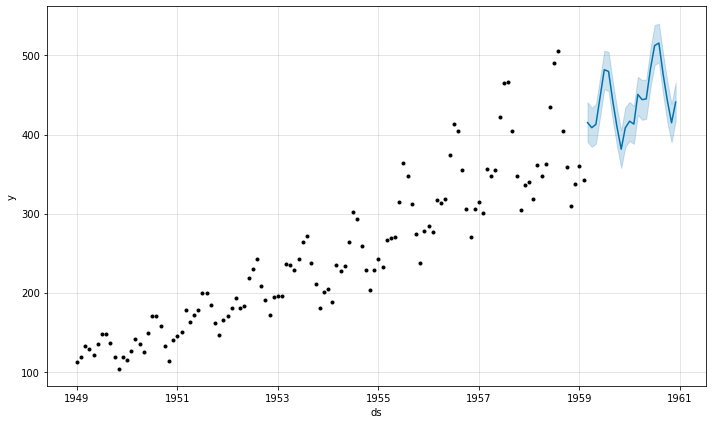

In [22]:
# Python
fig1 = m.plot(forecast)


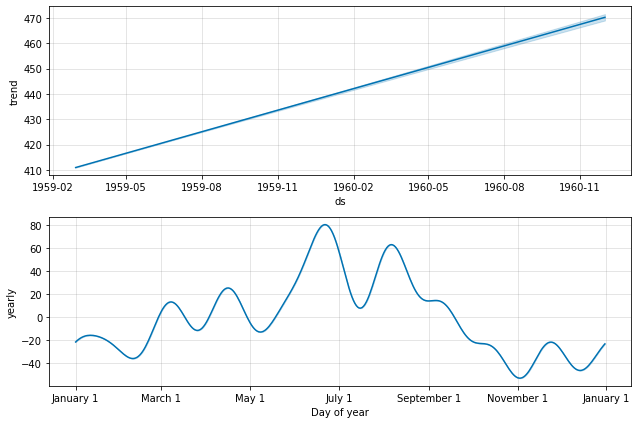

In [23]:
# Python
fig2 = m.plot_components(forecast)

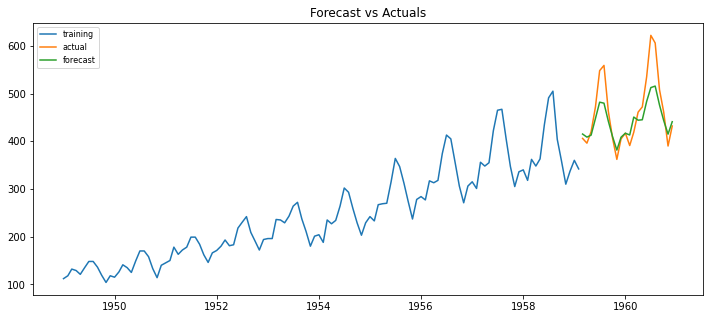

In [32]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(train['ds'],train['y'], label='training')
plt.plot(test['ds'],test['y'] ,label='actual')
plt.plot(forecast['ds'],forecast['yhat'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(test['y'], forecast['yhat'])
print('mse=',mse)

mse= 1805.141937458964
